Mô hình sử dụng thuật toán Stochastic gradient descent. Cũng giống như gradient descent, thuật toán sẽ hướng tới minimize hàm loss, tính gradient của hàm loss, cập nhật lại tham số bằng learning rate và lặp lại tính gradian hàm loss để minimize 

In [1]:
import pandas as pd

In [2]:
BID = pd.read_csv('./dataset/BID1.csv')
BID.head(5)

,Symbol,Value,TradingDate,Time,Open,High,Low,Close,Volume
0,BID,1.590710e+11,24/1/2014,NaN,19000,19500,18500,18800,8417060
1,BID,5.950934e+10,27/1/2014,NaN,18700,18800,18100,18400,3240910
2,BID,1.713530e+10,6/2/2014,NaN,18200,18300,17600,17600,959590
3,BID,5.025221e+10,7/2/2014,NaN,17400,17500,16500,16600,2987600
4,BID,6.791783e+10,10/2/2014,NaN,16500,17200,16200,17000,4052090


In [3]:
inputCols = ["Open", "High", "Low", "Volume"]
X = BID[inputCols]
X.head()

,Open,High,Low,Volume
0,19000,19500,18500,8417060
1,18700,18800,18100,3240910
2,18200,18300,17600,959590
3,17400,17500,16500,2987600
4,16500,17200,16200,4052090


In [4]:
y = BID["Close"]
y.head()

0    18800
1    18400
2    17600
3    16600
4    17000
Name: Close, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 2432
Labels counts in y_train: 1945
Labels counts in y_test: 487


In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:

regr = MLPRegressor(random_state=1, max_iter=500, learning_rate = "adaptive")

In [9]:
regr.fit(X_train, y_train)

MLPRegressor(learning_rate='adaptive', max_iter=500, random_state=1)

In [10]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
r2_score_train = regr.score(X_train, y_train)
r2_score_test = regr.score(X_test, y_test)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print("r2 score train = ", r2_score_train)
print("r2 score test = ", r2_score_test)
print("MSE train = ", MSE_train)
print("MSE test = ", MSE_test)

r2 score train =  0.9932586820264863
r2 score test =  0.9969745959336619
MSE train =  850740.5105180036
MSE test =  396871.4118865495


## Model selection cho Neural Network dùng phương pháp holdout

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 1)

In [15]:
train_MSE = []
val_MSE = []
test_MSE = []

alphas = [1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,2e-4,3e-4,4e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3,5e-3]

for alpha in alphas:
    regr = MLPRegressor(alpha = alpha, random_state=1, max_iter=500, solver = "lbfgs")

    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    y_val_pred = regr.predict(X_val)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_val = mean_squared_error(y_val, y_val_pred)
    MSE_test = mean_squared_error(y_test,y_test_pred)

    train_MSE.append(MSE_train)
    val_MSE.append(MSE_val)
    test_MSE.append(MSE_test)

    print('alpha: {:3} | train MSE: {:5} | val MSE: {:5} | test MSE: {:5}'.
          format(alpha, round(MSE_train, 2), round(MSE_val, 2), round(MSE_test, 2)))

alpha: 1e-07 | train MSE: 666923.93 | val MSE: 124354.57 | test MSE: 128765.9


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 5e-07 | train MSE: 652099.18 | val MSE: 107668.75 | test MSE: 112052.96


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 1e-06 | train MSE: 652066.18 | val MSE: 108791.82 | test MSE: 113408.13
alpha: 5e-06 | train MSE: 654957.5 | val MSE: 111678.98 | test MSE: 116308.58
alpha: 1e-05 | train MSE: 651904.44 | val MSE: 107249.86 | test MSE: 111796.78
alpha: 5e-05 | train MSE: 651889.39 | val MSE: 107521.23 | test MSE: 111753.98
alpha: 0.0001 | train MSE: 651912.2 | val MSE: 107226.54 | test MSE: 111749.07
alpha: 0.0002 | train MSE: 651921.28 | val MSE: 107244.94 | test MSE: 111763.01
alpha: 0.0003 | train MSE: 651814.85 | val MSE: 107254.58 | test MSE: 111831.8
alpha: 0.0004 | train MSE: 668988.82 | val MSE: 120591.35 | test MSE: 127347.1
alpha: 0.0005 | train MSE: 651879.61 | val MSE: 107258.15 | test MSE: 111796.66
alpha: 0.0006 | train MSE: 652011.51 | val MSE: 107140.66 | test MSE: 111644.9
alpha: 0.0007 | train MSE: 665160.5 | val MSE: 119226.75 | test MSE: 125304.4
alpha: 0.0008 | train MSE: 652093.03 | val MSE: 108303.58 | test MSE: 113120.0


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.0009 | train MSE: 653898.47 | val MSE: 107891.68 | test MSE: 111860.72
alpha: 0.001 | train MSE: 653926.81 | val MSE: 110006.93 | test MSE: 114500.26
alpha: 0.005 | train MSE: 707581.04 | val MSE: 154548.23 | test MSE: 152827.18


In [16]:
best_alpha =0.005
print("best alpha = ", best_alpha)

best alpha =  0.005


In [17]:
import matplotlib.pyplot as plt

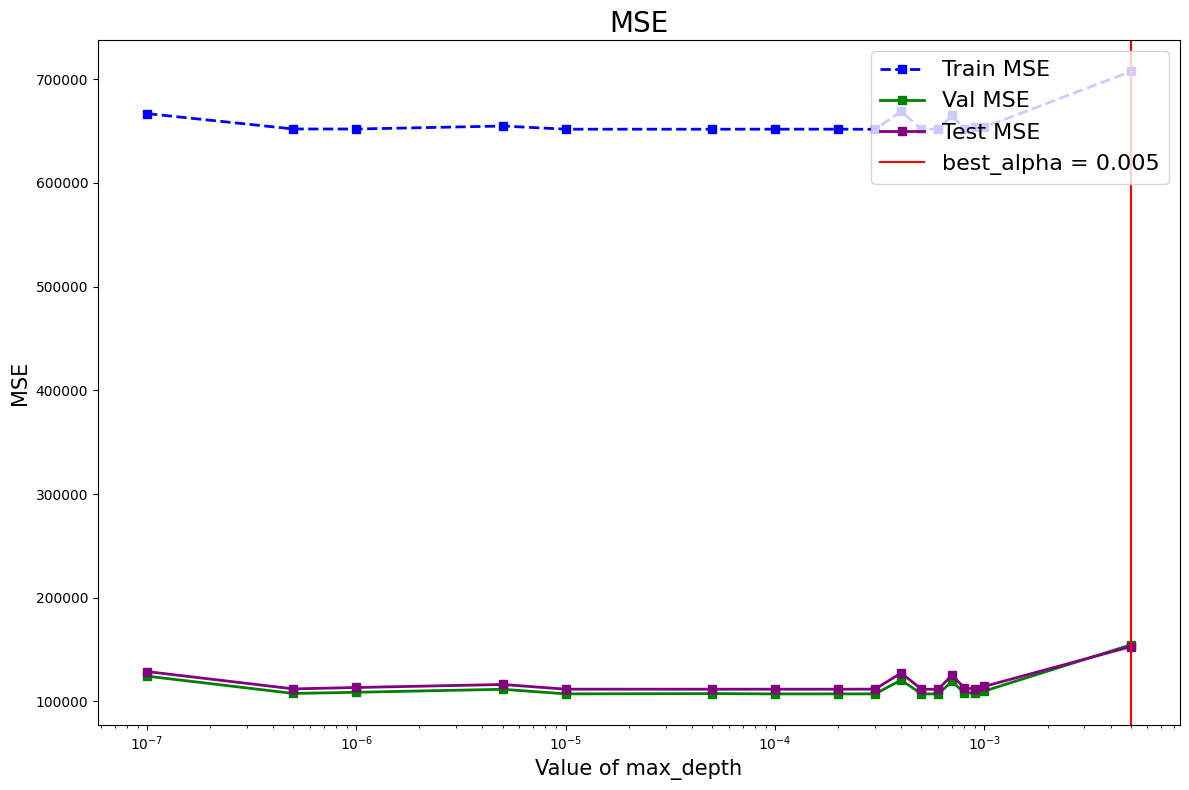

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(alphas, train_MSE, 's--', label = 'Train MSE', color = 'blue', linewidth = 2)

ax.plot(alphas, val_MSE, 's-', label = 'Val MSE', color ='green', linewidth = 2)

ax.plot(alphas, test_MSE, 's-', label = 'Test MSE', color ='purple', linewidth = 2)

ax.axvline(best_alpha, 0, 1, color = 'r', label = f'best_alpha = {best_alpha}')

ax.set_xlabel('Value of max_depth', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
ax.legend(loc = 'upper right', fontsize = 16)
ax.set_title('MSE', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [19]:
regr = MLPRegressor(alpha = best_alpha, random_state=1, max_iter=500, solver = "lbfgs")
regr.fit(X_train_val,y_train_val)
y_train_pred = regr.predict(X_train_val)
y_test_pred = regr.predict(X_test)

MSE_train = mean_squared_error(y_train_val, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

print("MSE train = ", MSE_train)
print("MSE test = ", MSE_test)

MSE train =  515373.30517361185
MSE test =  110413.75682965125


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Model selection cho neural network dùng phương pháp cross validation

In [20]:
from sklearn.model_selection import KFold
import numpy as np

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

alphas = [1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,2e-4,3e-4,4e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3,5e-3]

kf = KFold(n_splits = 10, shuffle=True) 
trainMSE = []
valMSE = []
testMSE = []
for alpha in alphas:
    train_MSE = []
    val_MSE = []
    test_MSE = []

    for train_index, val_index in kf.split(X_train):

        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index] 
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        regr = MLPRegressor(alpha = alpha, random_state=1, max_iter=1000, solver = "lbfgs")

        regr.fit(X_train_fold, y_train_fold)
        
        y_train_pred = regr.predict(X_train_fold)
        
        y_val_pred = regr.predict(X_val_fold)

        y_test_pred = regr.predict(X_test)

        MSE_train = mean_squared_error(y_train_fold, y_train_pred)
        MSE_val = mean_squared_error(y_val_fold, y_val_pred)
        MSE_test = mean_squared_error(y_test, y_test_pred)

        train_MSE.append(MSE_train)
        val_MSE.append(MSE_val)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(MSE_train))
    valMSE.append(np.mean(MSE_val))
    testMSE.append(np.mean(MSE_test))
    print('alpha: {:3} | train fold MSE: {:5} | val fold MSE: {:5} | test MSE: {:5}'.
          format(alpha, round(np.mean(MSE_train), 2), round(np.mean(MSE_val), 2), round(np.mean(MSE_test), 2)))

alpha: 1e-07 | train fold MSE: 103516.04 | val fold MSE: 4261061.15 | test MSE: 113902.91
alpha: 5e-07 | train fold MSE: 561581.81 | val fold MSE: 98545.57 | test MSE: 110899.84
alpha: 1e-06 | train fold MSE: 565441.54 | val fold MSE: 121317.31 | test MSE: 116604.66
alpha: 5e-06 | train fold MSE: 558604.21 | val fold MSE: 276666.66 | test MSE: 110848.21
alpha: 1e-05 | train fold MSE: 562348.67 | val fold MSE: 93824.68 | test MSE: 110794.15
alpha: 5e-05 | train fold MSE: 585965.5 | val fold MSE: 206669.66 | test MSE: 146052.85
alpha: 0.0001 | train fold MSE: 560616.27 | val fold MSE: 109166.24 | test MSE: 109728.05
alpha: 0.0002 | train fold MSE: 661920.16 | val fold MSE: 247172.04 | test MSE: 186217.19
alpha: 0.0003 | train fold MSE: 570877.31 | val fold MSE: 144047.67 | test MSE: 119008.76
alpha: 0.0004 | train fold MSE: 563297.04 | val fold MSE: 82522.25 | test MSE: 110654.92


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.0005 | train fold MSE: 567175.76 | val fold MSE: 88507.01 | test MSE: 115714.22
alpha: 0.0006 | train fold MSE: 570631.76 | val fold MSE: 81352.69 | test MSE: 119953.54
alpha: 0.0007 | train fold MSE: 559808.8 | val fold MSE: 114606.73 | test MSE: 110712.16
alpha: 0.0008 | train fold MSE: 925798.99 | val fold MSE: 282487.89 | test MSE: 326349.42
alpha: 0.0009 | train fold MSE: 562740.84 | val fold MSE: 96772.9 | test MSE: 111985.09
alpha: 0.001 | train fold MSE: 571079.99 | val fold MSE: 105731.5 | test MSE: 119949.28


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.005 | train fold MSE: 593451.29 | val fold MSE: 180115.92 | test MSE: 130796.51


In [22]:
best_alpha = 0.0004


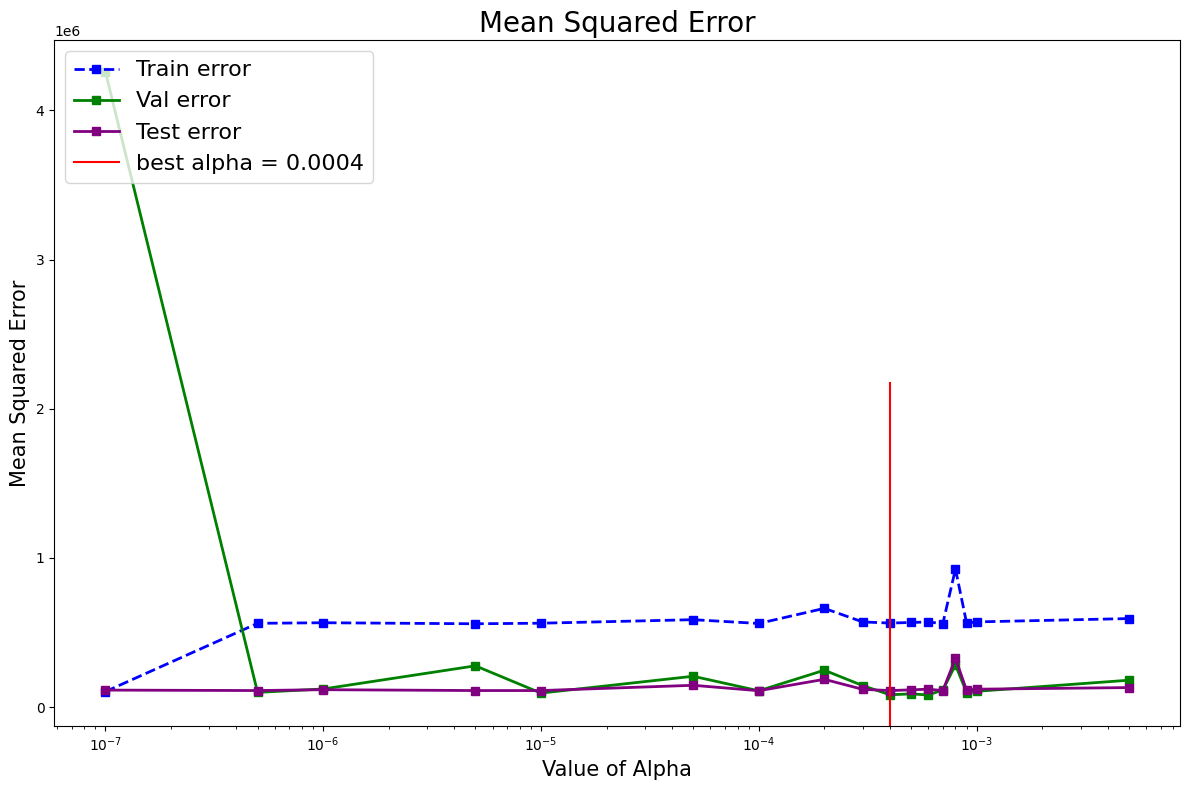

In [23]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(alphas, trainMSE, 's--', label = 'Train error', color = 'blue', linewidth = 2)

ax.plot(alphas, valMSE, 's-', label = 'Val error',color ='green', linewidth = 2)

ax.plot(alphas, testMSE, 's-', label = 'Test error',color ='purple', linewidth = 2)

ax.axvline(best_alpha, 0, 0.5, color = 'r', label = f'best alpha = {best_alpha}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [24]:
regr = MLPRegressor(alpha = best_alpha, random_state=1, max_iter=1000, solver = "lbfgs")

regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

y_test_pred = regr.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

print('train MSE: {:5} | test MSE: {:5}'.
    format(round(MSE_train, 2), round(MSE_test, 2)))

train MSE: 568902.77 | test MSE: 149292.46
